In [3]:
import pandas as pd
from pandas import json_normalize
import numpy as np                  
import json as js
import ast as ast
import re


In [4]:
games = pd.read_json('./Original_JSON/output_steam_games.json', lines=True)


In [5]:
games

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
1,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
2,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
3,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
4,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,0.0,773640.0,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,0.0,733530.0,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,0.0,610660.0,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,0.0,658870.0,"xropi,stev3ns"


In [6]:
reviews = []
archivo = r'./Original_JSON/australian_user_reviews.json'
with open(archivo, encoding='utf-8') as file:
    for line in file.readlines():
        reviews.append(ast.literal_eval(line))

reviews = pd.DataFrame(reviews)
reviews = reviews.explode('reviews')

In [7]:
items = []
archivo2 = r'./Original_JSON/australian_users_items.json'
with open(archivo2, encoding='utf-8') as file:
    for line in file.readlines():
        items.append(ast.literal_eval(line))

items = pd.DataFrame(items)
items = items.explode('items')

In [8]:
reviews

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'funny': '', 'posted': 'Posted November 5, 20..."
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'funny': '', 'posted': 'Posted July 15, 2011...."
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'funny': '', 'posted': 'Posted April 21, 2011..."
1,js41637,http://steamcommunity.com/id/js41637,"{'funny': '', 'posted': 'Posted June 24, 2014...."
1,js41637,http://steamcommunity.com/id/js41637,"{'funny': '', 'posted': 'Posted September 8, 2..."
...,...,...,...
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"{'funny': '', 'posted': 'Posted July 10.', 'la..."
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"{'funny': '', 'posted': 'Posted July 8.', 'las..."
25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,"{'funny': '1 person found this review funny', ..."
25798,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,"{'funny': '', 'posted': 'Posted July 20.', 'la..."


In [9]:
items

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'item_id': '10', 'item_name': 'Counter-Strike..."
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'item_id': '20', 'item_name': 'Team Fortress ..."
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'item_id': '30', 'item_name': 'Day of Defeat'..."
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'item_id': '40', 'item_name': 'Deathmatch Cla..."
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'item_id': '50', 'item_name': 'Half-Life: Opp..."
...,...,...,...,...,...
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"{'item_id': '373330', 'item_name': 'All Is Dus..."
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"{'item_id': '388490', 'item_name': 'One Way To..."
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"{'item_id': '521570', 'item_name': 'You Have 1..."
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,"{'item_id': '519140', 'item_name': 'Minds Eyes..."


In [10]:
reviews_flat = pd.json_normalize(reviews['reviews']) # desanida la columna reviews 

reviews = pd.concat([reviews.drop(columns=['reviews']).reset_index(drop=True), reviews_flat], axis=1)
#                     elimina la columna original / reseta el indice / une los datasets

In [11]:
reviews

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,http://steamcommunity.com/id/js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,js41637,http://steamcommunity.com/id/js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...
...,...,...,...,...,...,...,...,...,...
59328,76561198312638244,http://steamcommunity.com/profiles/76561198312...,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...
59329,76561198312638244,http://steamcommunity.com/profiles/76561198312...,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...
59330,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...
59331,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,,Posted July 20.,,730,No ratings yet,True,:D


In [12]:
items_flat = pd.json_normalize(items['items']) # desanida la columna reviews


items = pd.concat([items.drop(columns=['items']).reset_index(drop=True), items_flat], axis=1)
#                    elimina la columna original / reseta el indice / une los datasets

items = items.replace('', None) # Reemplaza los valores vacios a none


In [13]:
#Realizo una correcion de datos en precio 
mask =games['price'].apply(lambda x: isinstance(x,str))
games.loc[mask,'price'] =0.00
games['price'] = pd.to_numeric(games['price'], errors='coerce')

#cambiamos tipo de datos 
games['early_access'] = games['early_access'].fillna(0).astype(int) 
games['early_access'] = games['early_access'].astype(int)


def conver_fecha(fecha):
    for fmt in ['%d %Y', '%b %Y', '%Y-%m-%d', '%Y']:
        try:
            return pd.to_datetime(fecha, format=fmt)
        except ValueError:
            continue
    match = re.search(r'\b(\d{4})\b', fecha)
    if match:
        return pd.to_datetime(match.group(1), format='%Y')
    return pd.NaT



# EDA
se comienza a partir de aquí a realizar el EDA, ya con la data limpia derivada del proceso de ETL. 


In [14]:
#Importamos las librerias necesarias 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns 






Iniciamos borrando duplicados y nulos de la tabla games y la tabla items. 

In [15]:
# GAMES 

games = games.dropna(how='all') #borra filas donde las celdas sean nulas 

games = games.drop_duplicates(subset=[
    'publisher','app_name','title','url','release_date','reviews_url','price','early_access','id','developer'
    ]) # borramos duplicados 

# ITEMS
items = items.drop_duplicates() # borramos duplicados
items = items.dropna() # eliminamos nulo

#REVIEWS 
reviews = reviews.drop_duplicates() # borramos duplicados
reviews = reviews.dropna() # eliminamos nulo

In [16]:
games

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,None,None,None,None,None,None,None,None,None,NaN,0,NaN,None
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0,761140.0,Kotoshiro
88311,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",0.00,0,643980.0,Secret Level SRL
88312,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",0.00,0,670290.0,Poolians.com
88313,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,0,767400.0,彼岸领域
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,0,773640.0,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,0,733530.0,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,0,610660.0,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,0,658870.0,"xropi,stev3ns"


In [17]:
reviews

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,http://steamcommunity.com/id/js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
4,js41637,http://steamcommunity.com/id/js41637,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...
...,...,...,...,...,...,...,...,...,...
59328,76561198312638244,http://steamcommunity.com/profiles/76561198312...,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...
59329,76561198312638244,http://steamcommunity.com/profiles/76561198312...,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...
59330,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...
59331,LydiaMorley,http://steamcommunity.com/id/LydiaMorley,,Posted July 20.,,730,No ratings yet,True,:D


In [18]:
items

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10,Counter-Strike,6.0,0.0
1,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,20,Team Fortress Classic,0.0,0.0
2,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,30,Day of Defeat,7.0,0.0
3,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,40,Deathmatch Classic,0.0,0.0
4,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,50,Half-Life: Opposing Force,0.0,0.0
...,...,...,...,...,...,...,...,...
5170009,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,346330,BrainBread 2,0.0,0.0
5170010,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,373330,All Is Dust,0.0,0.0
5170011,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,388490,One Way To Die: Steam Edition,3.0,3.0
5170012,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,521570,You Have 10 Seconds 2,4.0,4.0


In [19]:
games.to_json('./data_limpia/output_steam_games_limpia.json',orient='records',lines=True)
reviews.to_json('./data_limpia/australian_user_reviews.json',orient='records',lines=True)
items.to_json('./data_limpia/australian__user_items.json',orient='records',lines=True)

In [20]:
df_games = pd.read_json('./data_limpia/output_steam_games_limpia.json', lines=True)

In [21]:
df_games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32136 entries, 0 to 32135
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24083 non-null  object 
 1   genres        28852 non-null  object 
 2   app_name      32133 non-null  object 
 3   title         30085 non-null  object 
 4   url           32135 non-null  object 
 5   release_date  30068 non-null  object 
 6   tags          31972 non-null  object 
 7   reviews_url   32133 non-null  object 
 8   specs         31465 non-null  object 
 9   price         30758 non-null  float64
 10  early_access  32136 non-null  int64  
 11  id            32133 non-null  float64
 12  developer     28836 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 3.2+ MB


In [22]:
df_games.isnull()
df_games.dtypes

publisher        object
genres           object
app_name         object
title            object
url              object
release_date     object
tags             object
reviews_url      object
specs            object
price           float64
early_access      int64
id              float64
developer        object
dtype: object

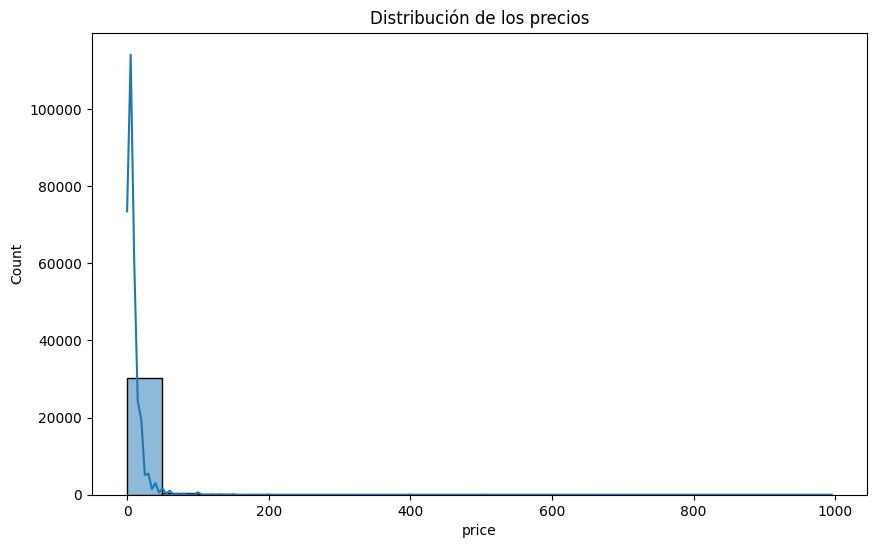

In [23]:
#Vemos la distribución del precio 
plt.figure(figsize=(10, 6))
sns.histplot(games['price'].dropna(), bins=20, kde=True)
plt.title('Distribución de los precios')
plt.show()

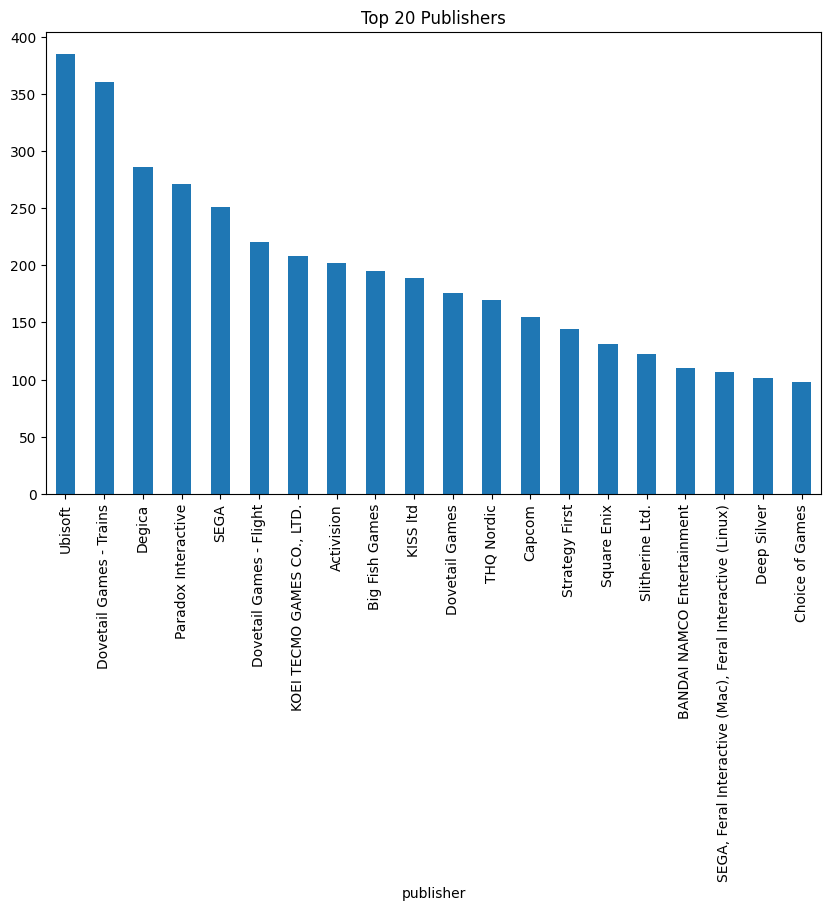

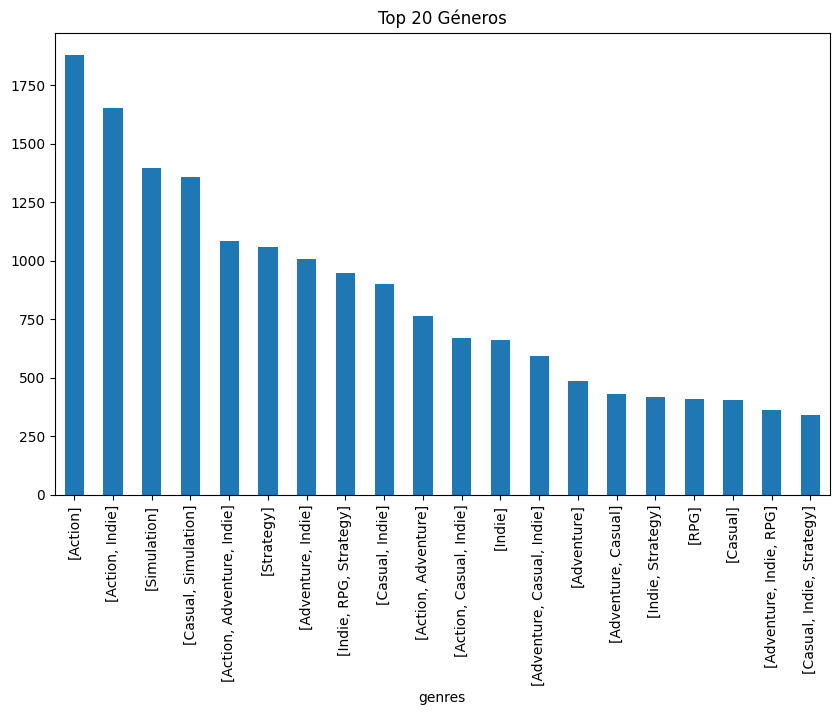

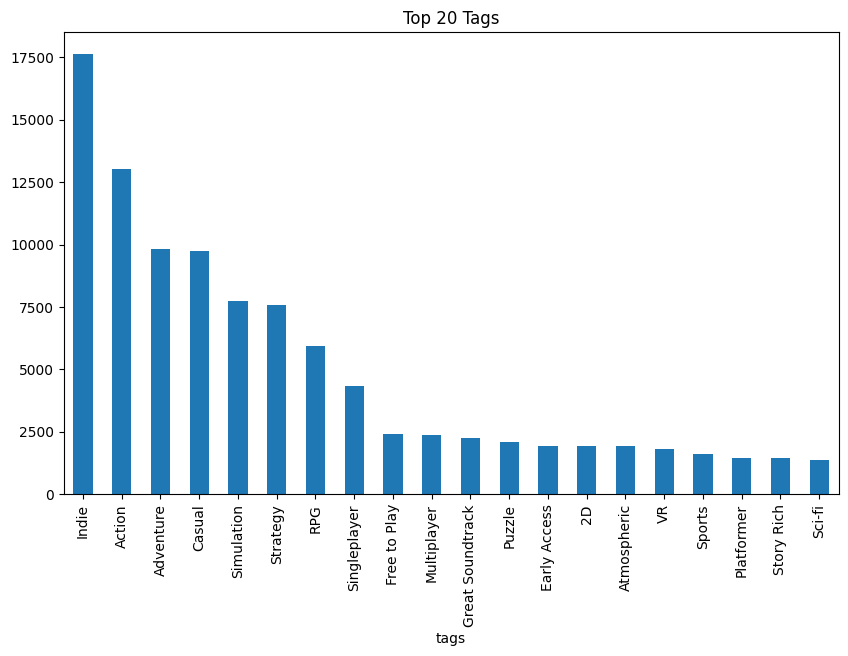

In [24]:
#Análisis de las columnas categóricas
# Distribución de los publishers
plt.figure(figsize=(10, 6))
df_games['publisher'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Publishers')
plt.show()

# Análisis de los géneros más comunes
plt.figure(figsize=(10, 6))
df_games['genres'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Géneros')
plt.show()

# Tags más frecuentes
df_games['tags'] = df_games['tags'].fillna('') 
tags_series = df_games.explode('tags')['tags'].value_counts()
plt.figure(figsize=(10, 6))
tags_series.head(20).plot(kind='bar')
plt.title('Top 20 Tags')
plt.show()

# PASAMOS A HACER UN EDA DEL DATASET DE REVIEWS 

In [25]:
df_reviews = pd.read_json('./data_limpia/australian_user_reviews_limpia.json', lines=True)

C:\Users\Aleks\AppData\Local\Temp\ipykernel_18716\2341945899.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_reviews, x='recommend', palette='Set1')


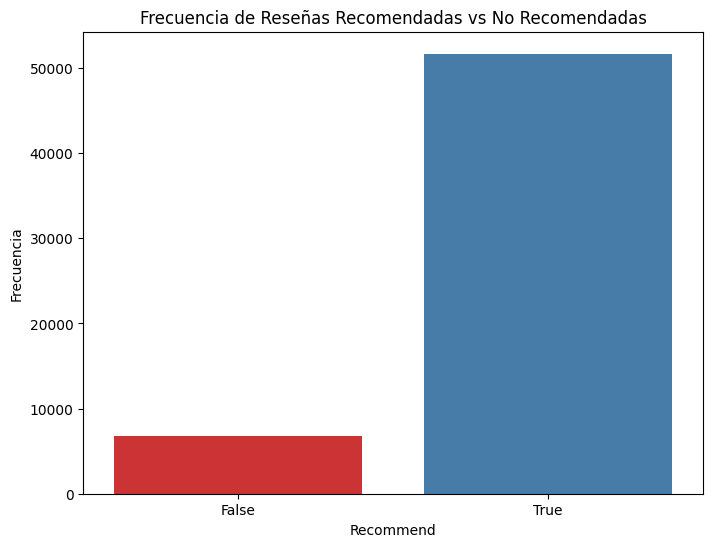

In [26]:
# 1. Relación entre 'helpful' y 'funny', esto nos permite a identificar alguna correlación entre ambas variables: que tan útiles y qúe tan graciosas son las reseñas 
plt.figure(figsize=(8,6))
sns.countplot(data=df_reviews, x='recommend', palette='Set1')
plt.title('Frecuencia de Reseñas Recomendadas vs No Recomendadas')
plt.xlabel('Recommend')
plt.ylabel('Frecuencia')
plt.show()


In [27]:
#Descripción estadística de las columnas numéricas
numerical_description = df_reviews[['funny', 'helpful']].describe()
numerical_description

,funny,helpful
count,58431,58431
unique,186,1344
top,,No ratings yet
freq,50421,29732


In [28]:
df_reviews['posted'] = df_reviews['posted'].str.replace('Posted ', '', regex=False)  # Eliminar la palabra "Posted"
df_reviews['posted'] = pd.to_datetime(df_reviews['posted'], format='%B %d, %Y', errors='coerce')  # Convertir a datetime

EDA PARA TABLA ITEMS

In [29]:
df_items = pd.read_json(('./data_limpia/australian_user_items_limpia.json'), lines=True)

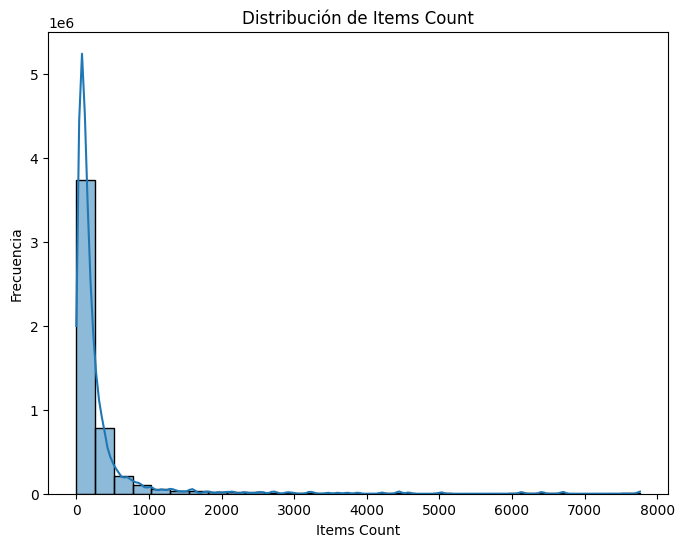

In [30]:
#Realizo la distribución de items_count que me peritira cuantos articulos tienen los usuarios 
plt.figure(figsize=(8, 6))
sns.histplot(df_items['items_count'], bins=30, kde=True)
plt.title('Distribución de Items Count')
plt.xlabel('Items Count')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\Aleks\AppData\Local\Temp\ipykernel_18716\3728342660.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.index, y=top_users.values, palette='viridis')


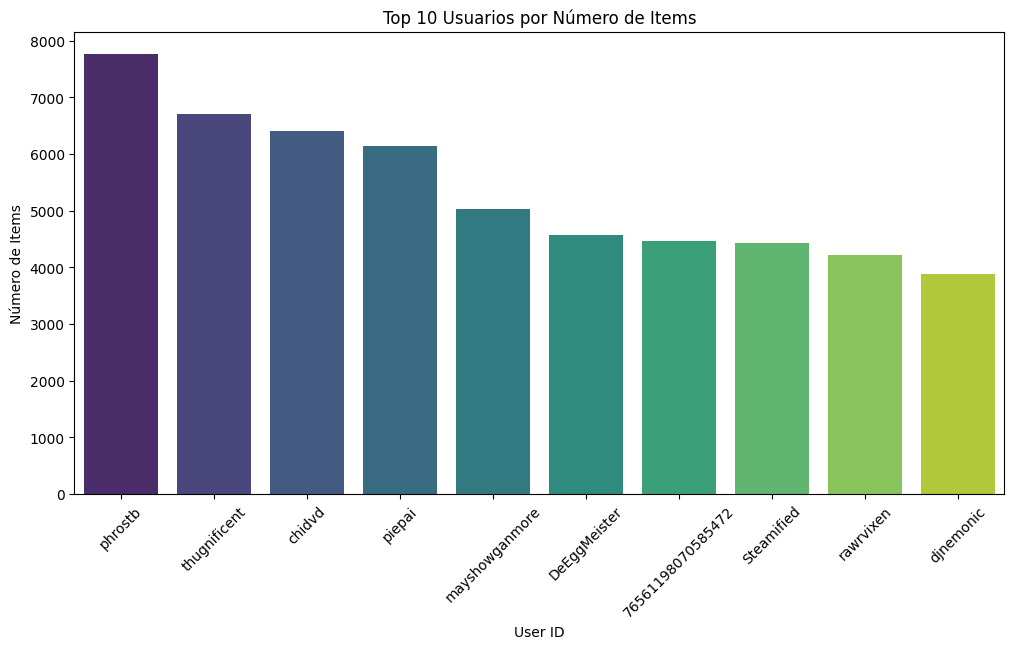

In [31]:
#Agregamos un grafico de barras que nos muestra cuantos articulos tiene cada usuario. 
plt.figure(figsize=(12, 6))
top_users = df_items['user_id'].value_counts().head(10)
sns.barplot(x=top_users.index, y=top_users.values, palette='viridis')
plt.title('Top 10 Usuarios por Número de Items')
plt.xlabel('User ID')
plt.ylabel('Número de Items')
plt.xticks(rotation=45)
plt.show()

C:\Users\Aleks\AppData\Local\Temp\ipykernel_18716\1513845770.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_playtime_per_item.index, y=avg_playtime_per_item.values, palette='magma')


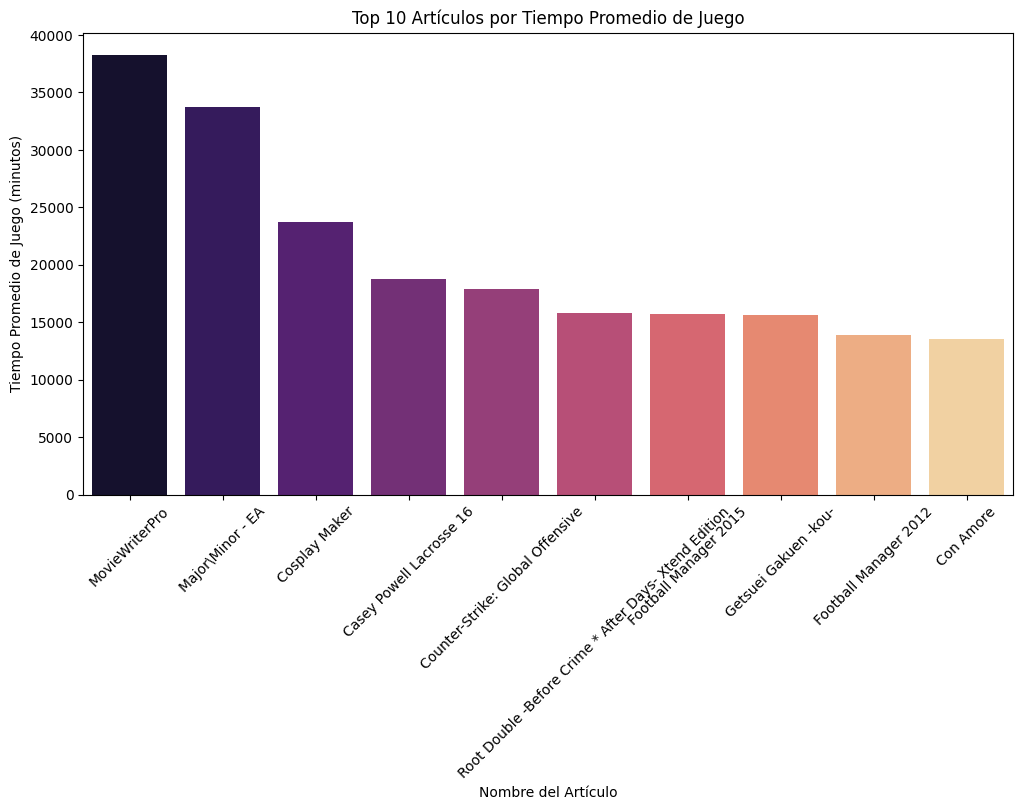

In [32]:
#Utilizamos un grafico de barra que nos muestra el tiempo de promeddio de juego por articulo.
plt.figure(figsize=(12, 6))
avg_playtime_per_item = df_items.groupby('item_name')['playtime_forever'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_playtime_per_item.index, y=avg_playtime_per_item.values, palette='magma')
plt.title('Top 10 Artículos por Tiempo Promedio de Juego')
plt.xlabel('Nombre del Artículo')
plt.ylabel('Tiempo Promedio de Juego (minutos)')
plt.xticks(rotation=45)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './data_limpia/output_steam_games_limpia.parquet'

ArrowTypeError: ("Expected bytes, got a 'list' object", 'Conversion failed for column tags with type object')